In [2]:
import pandas as pd

In [2]:
df = pd.read_excel('data/tmb_fc_data.xlsx', sheet_name='player_info')
df

,player_name,primary_position,secondary_position,number,team_name,fav_club
0,Khalis,FWD,MID,10,TMB FC,Tottenham
1,Faris,DEF,MID,20,TMB FC,Liverpool
2,Hafiz,FWD,DEF,2,TMB FC,Liverpool
3,Danish,DEF,GK,3,TMB FC,Tottenham
4,Imran,FWD,NaN,7,TMB FC,Arsenal
5,Isa,DEF,NaN,4,TMB FC,Chelsea
6,Muk,FWD,NaN,8,TMB FC,Chelsea
7,Abdullah,GK,MID,1,TMB FC,NaN
8,Farhan,GK,NaN,14,TMB FC,NaN
9,Ashraf,DEF,NaN,27,TMB FC,NaN


In [58]:
import numpy as np
type(df[df['player_name']=='Farhan']['secondary_position'].iloc[0])

float

In [59]:
type(df[df['player_name']=='Danish']['secondary_position'].iloc[0])

str

In [31]:
df2 = df[df['primary_position']=='FWD']
df2.reset_index(inplace=True, drop=True)
df2

,player_name,primary_position,secondary_position,number,team_name,fav_club
0,Khalis,FWD,MID,10,TMB FC,Tottenham
1,Hafiz,FWD,DEF,2,TMB FC,Liverpool
2,Imran,FWD,NaN,7,TMB FC,Arsenal
3,Muk,FWD,NaN,8,TMB FC,Chelsea
4,Hamizan,FWD,MID,12,TMB FC,Manchester United


In [33]:
list(df['player_name'])

['Khalis',
 'Faris',
 'Hafiz',
 'Danish',
 'Imran',
 'Isa',
 'Muk',
 'Abdullah',
 'Farhan',
 'Ashraf',
 'Hamizan',
 'Hanif',
 'Nabil',
 'Gan']

In [13]:
# Example 6: Using pandas DataFrame.reset_index()
df2 = df.groupby(['primary_position'])['primary_position'].count()
df2

primary_position
DEF    6
FWD    5
GK     2
MID    1
Name: primary_position, dtype: int64

In [22]:
count_of_positions = {position: df2[position] for position in df2.index}
count_of_positions

{'DEF': 6, 'FWD': 5, 'GK': 2, 'MID': 1}

In [36]:
if 6 in count_of_positions.values():
    print('yes')

yes


In [38]:
# Value to search
value_to_find = 6

# Find the key corresponding to the value
key = next((k for k, v in count_of_positions.items() if v == value_to_find), None)
key

'DEF'

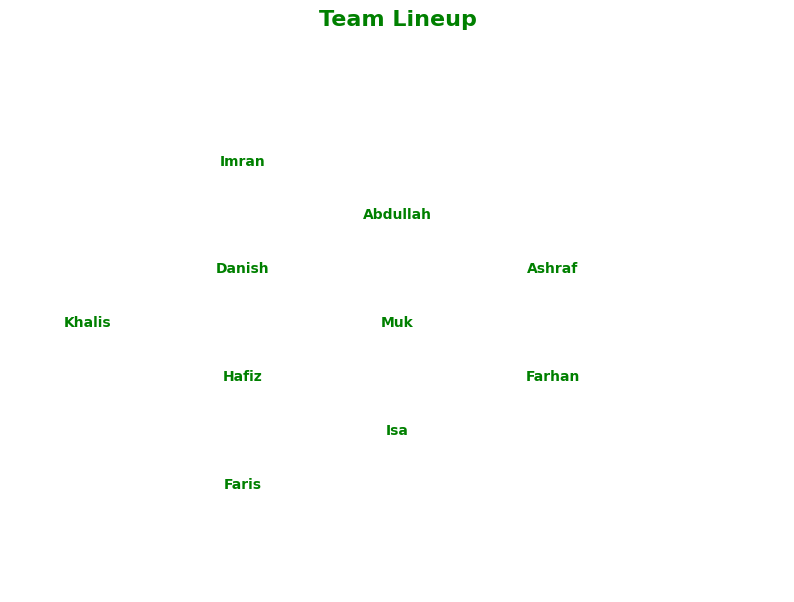

In [25]:
import matplotlib.pyplot as plt

# Function to draw the football pitch
def draw_pitch():
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_facecolor('green')

    # Draw pitch outline
    plt.plot([0, 0, 100, 100, 0], [0, 100, 100, 0, 0], color="white", linewidth=2)
    plt.plot([50, 50], [0, 100], color="white", linewidth=2)  # Halfway line
    plt.plot([0, 100], [50, 50], color="white", alpha=0)  # Transparency to avoid clutter

    # Center circle
    center_circle = plt.Circle((50, 50), 10, color="white", fill=False, linewidth=2)
    ax.add_patch(center_circle)
    ax.plot(50, 50, 'wo')  # Center spot

    return fig, ax

# Player lineup
players = {
    "Goalkeeper": [(10, 50)],
    "Defenders": [(30, 20), (30, 40), (30, 60), (30, 80)],
    "Midfielders": [(50, 30), (50, 50), (50, 70)],
    "Forwards": [(70, 40), (70, 60)],
}

player_names = [
    "Khalis", "Faris", "Hafiz", "Danish",  # Defenders
    "Imran", "Isa", "Muk",                # Midfielders
    "Abdullah", "Farhan",                 # Forwards
    "Ashraf",                             # Goalkeeper
]

# Map names to positions
positions = [pos for role in players.values() for pos in role]

fig, ax = draw_pitch()

# Plot players
for (x, y), name in zip(positions, player_names):
    ax.text(x, y, name, color="green", ha="center", va="center", fontsize=10, fontweight="bold")
    ax.plot(x, y, 'wo', markersize=8)  # Player marker

plt.title("Team Lineup", color="green", fontsize=16, fontweight="bold", pad=20)
plt.axis("off")
plt.show()


In [14]:
df = pd.read_excel('../data/tmb_fc_data.xlsx', sheet_name='goals')
df

,Date,Khalis,Faris,Hafiz,Danish,Imran,Isa,Muk,Abdullah,Farhan,Ashraf,Hamizan,Hanif,Nabil,Gan
0,2023-12-16,5.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-07,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-27,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-18,5.0,3.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-24,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-03-03,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-03-08,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-05-21,1.0,1.0,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-06-16,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-06-22,1.0,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Calculate the total goals for each row (ignoring NaN values)
df['Total Goals'] = df.iloc[:, 1:-1].sum(axis=1)
df

,Date,Khalis,Faris,Hafiz,Danish,Imran,Isa,Muk,Abdullah,Farhan,Ashraf,Hamizan,Hanif,Nabil,Gan,Total Goals
0,2023-12-16,5.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,2024-01-07,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,2024-01-27,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,2024-02-18,5.0,3.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
4,2024-02-24,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
5,2024-03-03,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
6,2024-03-08,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
7,2024-05-21,1.0,1.0,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
8,2024-06-16,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
9,2024-06-22,1.0,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0


In [12]:
df['Total Goals'] = df['Khalis'] + df['Faris']
df

,Date,Khalis,Faris,Hafiz,Danish,Imran,Isa,Muk,Abdullah,Farhan,Ashraf,Hamizan,Hanif,Nabil,Gan,Total Goals
0,2023-12-16,5.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-07,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,2024-01-27,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-18,5.0,3.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4,2024-02-24,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5,2024-03-03,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6,2024-03-08,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-05-21,1.0,1.0,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
8,2024-06-16,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-06-22,1.0,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
list_players = list(df.columns)[1:]

df['Total Goals'] = df[list_players].sum(axis=0, skipna=True)

df

,Date,Khalis,Faris,Hafiz,Danish,Imran,Isa,Muk,Abdullah,Farhan,Ashraf,Hamizan,Hanif,Nabil,Gan,Total Goals
0,2023-12-16,5.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-07,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-27,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-18,5.0,3.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-24,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-03-03,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-03-08,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-05-21,1.0,1.0,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-06-16,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-06-22,1.0,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_players_only = df.drop('Date', axis=1)
df_players_only
df_players_only.sum()

Khalis      30.0
Faris       11.0
Hafiz        8.0
Danish      12.0
Imran        8.0
Isa          1.0
Muk         12.0
Abdullah     6.0
Farhan       0.0
Ashraf       0.0
Hamizan      4.0
Hanif        3.0
Nabil        1.0
Gan          0.0
dtype: float64

In [62]:
df_players_only = df.drop('Date', axis=1)
total_sum = df_players_only.sum().sum()
total_sum

96.0

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [64]:
# I need to generate synthetic data
#Read in the data
df = pd.read_csv('data/messibetis.csv')
df.head(10)

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38
5,messi,47,42,73,25,Pass,Successful,70,54
6,messi,49,47,75,43,Pass,Unsuccessful,82,38
7,messi,50,10,79,31,Pass,Successful,87,24
8,messi,50,17,82,52,Pass,Successful,93,68
9,messi,50,24,98,62,Pass,Unsuccessful,98,61


In [66]:
# Keep necessary columns only
df = df[['player','x','y','outcome','endX','endY']]
df.head(10)

,player,x,y,outcome,endX,endY
0,messi,50,50,Successful,40,43
1,messi,63,48,Successful,75,83
2,messi,74,58,Successful,71,65
3,messi,76,68,Successful,95,78
4,messi,100,1,Unsuccessful,96,38
5,messi,73,25,Successful,70,54
6,messi,75,43,Unsuccessful,82,38
7,messi,79,31,Successful,87,24
8,messi,82,52,Successful,93,68
9,messi,98,62,Unsuccessful,98,61


In [67]:
# 1. Load data from excel
excel_file = 'data/tmb_fc_data.xlsx'
player_info = pd.read_excel(excel_file, sheet_name='player_info')
player_pos = player_info[['player_name','primary_position']]
player_pos

,player_name,primary_position
0,Khalis,MID
1,Faris,DEF
2,Hafiz,FWD
3,Danish,DEF
4,Imran,FWD
5,Isa,DEF
6,Muk,FWD
7,Abdullah,GK
8,Farhan,GK
9,Ashraf,DEF


In [69]:
import random 

all_players_passes = pd.DataFrame()

for _, row in player_pos.iterrows():
    if row['primary_position']=='FWD':
        df_temp = df.copy()
        # Change the player name
        df_temp['player'] = row['player_name']

        # Randomise coordinates
        df_temp['x'] = df_temp['x'].apply(lambda i: random.randint(-10, 10)+i if i<100 and i>10 else random.randint(1, 100))
        df_temp['y'] = df_temp['y'].apply(lambda i: random.randint(-10, 10)+i if i<100 and i>10 else random.randint(1, 100))
        df_temp['endX'] = df_temp['endX'].apply(lambda i: random.randint(-10, 10)+i if i<100 and i>10 else random.randint(1, 100))
        df_temp['endY'] = df_temp['endY'].apply(lambda i: random.randint(-10, 10)+i if i<100 and i>10 else random.randint(1, 100))
    
    if row['primary_position']=='MID':
        df_temp = df.copy()
        # Change the player name
        df_temp['player'] = row['player_name']

        # Randomise coordinates
        df_temp['x'] = df_temp['x'].apply(lambda i: random.randint(-20, -5)+i if i>20 else random.randint(1, 90))
        df_temp['y'] = df_temp['y'].apply(lambda i: random.randint(-20, -5)+i if i>20 else random.randint(1, 90))
        df_temp['endX'] = df_temp['endX'].apply(lambda i: random.randint(-20, -5)+i if i>20 else random.randint(1, 90))
        df_temp['endY'] = df_temp['endY'].apply(lambda i: random.randint(-20, -5)+i if i>10 else random.randint(1, 90))

    if row['primary_position']=='DEF':
        df_temp = df.copy()
        # Change the player name
        df_temp['player'] = row['player_name']

        # Randomise coordinates
        df_temp['x'] = df_temp['x'].apply(lambda i: random.randint(-40, -20)+i if i>40 else random.randint(1, 65))
        df_temp['y'] = df_temp['y'].apply(lambda i: random.randint(-40, -20)+i if i>40 else random.randint(1, 65))
        df_temp['endX'] = df_temp['endX'].apply(lambda i: random.randint(-40, -20)+i if i>40 else random.randint(1, 65))
        df_temp['endY'] = df_temp['endY'].apply(lambda i: random.randint(-40, -20)+i if i>40 else random.randint(1, 65))

    if row['primary_position']=='GK':
        df_temp = df.copy()
        # Change the player name
        df_temp['player'] = row['player_name']

        # Randomise coordinates
        df_temp['x'] = df_temp['x'].apply(lambda i: random.randint(-40, -20)+i if i>10 else random.randint(1, 65))
        df_temp['y'] = df_temp['y'].apply(lambda i: random.randint(-40, -20)+i if i>40 else random.randint(1, 65))
        df_temp['endX'] = df_temp['endX'].apply(lambda i: random.randint(-40, -20)+i if i>40 else random.randint(1, 65))
        df_temp['endY'] = df_temp['endY'].apply(lambda i: random.randint(-40, -20)+i if i>40 else random.randint(1, 65))


    # Randomise outcome
    pass_percentage = random.randint(10, 50)
    df_temp['outcome'] = df_temp['outcome'].apply(lambda i: "Successful" if random.randint(1, 100)>=pass_percentage else "Unsuccessful")

    all_players_passes = pd.concat([all_players_passes,df_temp])

all_players_passes.head(20)

,player,x,y,outcome,endX,endY
0,Khalis,41,30,Successful,24,37
1,Khalis,47,31,Successful,65,70
2,Khalis,59,53,Unsuccessful,62,48
3,Khalis,56,60,Unsuccessful,83,64
4,Khalis,94,88,Unsuccessful,86,31
5,Khalis,63,13,Successful,59,48
6,Khalis,69,26,Successful,66,25
7,Khalis,59,20,Successful,75,4
8,Khalis,71,39,Successful,88,60
9,Khalis,81,50,Successful,78,43


In [70]:
all_players_passes.tail(20)

,player,x,y,outcome,endX,endY
29,Gan,60,36,Successful,59,33
30,Gan,59,24,Successful,79,25
31,Gan,95,85,Unsuccessful,84,89
32,Gan,71,88,Unsuccessful,53,75
33,Gan,63,80,Successful,61,65
34,Gan,53,35,Unsuccessful,53,70
35,Gan,47,56,Unsuccessful,51,49
36,Gan,64,49,Unsuccessful,65,77
37,Gan,59,68,Successful,50,57
38,Gan,87,74,Unsuccessful,82,72


In [72]:
# save as csv
all_players_passes.to_csv('data/dummy_pass_stats.csv', index=False)